# FN model for highly curved tip emitters

$J(F) = A\phi^{-1}F^2(t[y] + \frac{\phi}{eFR} \psi[y])^{-2} \exp(-\frac{B\phi^{3/2}}{F}(\nu [y] + \frac{\phi}{eFR} \omega[y]))$

Here, 

$\omega[y] \approx \frac{4}{5} - \frac{7y^2}{40} - \frac{y^2 \ln[y]}{100}$\
$\psi[y] = \frac{5}{3}y\frac{d\omega}{dy} \approx \frac{4}{3} - \frac{y^2}{500} - \frac{y^2 \ln[y]}{15}$

This equation is valid for tip radii greater than 5nm (in our case we use 200nm, so its fine), for surface fields in the range $3 \cdot 10^{9}$ V/m < F < $10^{10}$ V/m and for work functions in the range $3 eV < \phi < 5 eV$

In case the curvature radii is too large, this equation reduces to the standard FN equation

This calculation is based on Patterson's phD thesis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:

def J(F, typeOfFN, R):
    phi = 4.8
    e = 1.62e-19
    A = 1.54
    B = 6.83    
    if typeOfFN == 'elemental':
        j = A * F**2/phi * np.exp(-B * phi**(3/2)/F)
        #result.append(j)
    if typeOfFN == 'elemental_corr':
        y = 1.439964*F/phi**2
        ln = np.log(y)
        nu = 1 - y + 1/6*y*ln
        tau = 1+ 1/9 * y - 1/18 * y * ln
        j = A*tau**(-2)/phi* F**2 * np.exp(-nu*B*phi**(3/2)/F)
        #j= A/phi*F**2*np.exp(-B*phi**(3/2)/F)
        #result.append(j)
        #result.append(j_corr)
    
    if typeOfFN == 'sharp-emitter':
        y = 2*np.sqrt(2*A*F)/phi
        ln = np.log(y)
        nu = 1 - y**2 + 1/3*y**2 * ln
        #epsilon = 55.263 * 1e15 # e^2 eV^-1 m^-1    
        EF = 1.12
        psi = 4/3 - y**2/500 - y**2 * ln/15
        omega = 4/5 - 7*y**2/40 - y**2*ln/100
        t = 1 + 1/9 * y**2 - 1/9 * y**2 * ln
        j = A/phi*F**2*(t + phi/(F*R) * psi)**(-2) * np.exp(-B*phi**(3/2)/F*(nu + phi/(F*R) * omega))
        #j = A/phi*F**2*(t+psi)**(-2) * np.exp(-B*phi**(3/2)/F*(nu*omega))
        #result.append(j_sharp)


    #print(f'A value is {A}')
    #print(f'B value is {B}')  
    #y = 2*np.sqrt(B*F)/phi
    #print(f'y value is {y}')
    #print(f'ln of y is {ln}')
    #print(f'psi value is {psi}')
    #print(f'omega value is {omega}')
    #B = 8*math.pi np.sqrt(2*m0) / (3*e*h)
    #nu = 1 - y**2 + (1/3 * y**2 * ln)
    #print(f'nu value is {nu}')
    #print(f't value is {t}')
    #print(f'current density is {j}')
    return j

In [209]:
R = 10

result_1 = J(10, "elemental", R)
result_2 = J(10, "elemental_corr", R)
result_3 = J(10, "sharp-emitter",R)

print(result_1)
print(result_2)
print(result_3)

0.024373035856285055
2.6165064763895822
20666157306.442142


In [210]:
Fd = np.arange(.1, 10, 0.01)
Rd = np.arange(0, 50, 1)

currents_ele = []
currents_corr = []
currents_sharp = []
currents_sharp_radius = []

for i in range(0,len(Fd)):
    current = J(Fd[i], "elemental",R)
    currents_ele.append(current)

for i in range(0,len(Fd)):
    current = J(Fd[i], "elemental_corr",R)
    currents_corr.append(current)

for i in range(0,len(Fd)):
    current = J(Fd[i], "sharp-emitter",R)
    currents_sharp.append(current)

F=8
for i in range(0,len(Rd)):
    current = J(F, "sharp-emitter",Rd[i])
    currents_sharp_radius.append(current)


print(currents_sharp_radius[2])

4979209865.617292


C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\446038886.py:28: RuntimeWarning: divide by zero encountered in divide
  j = A/phi*F**2*(t + phi/(F*R) * psi)**(-2) * np.exp(-B*phi**(3/2)/F*(nu + phi/(F*R) * omega))


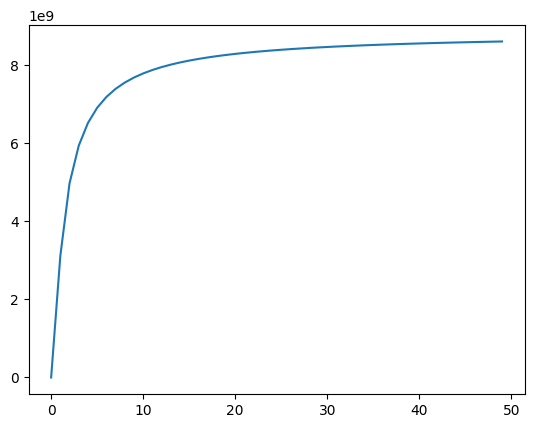

In [211]:
plt.plot(Rd, currents_sharp_radius)ko0-ko-ko

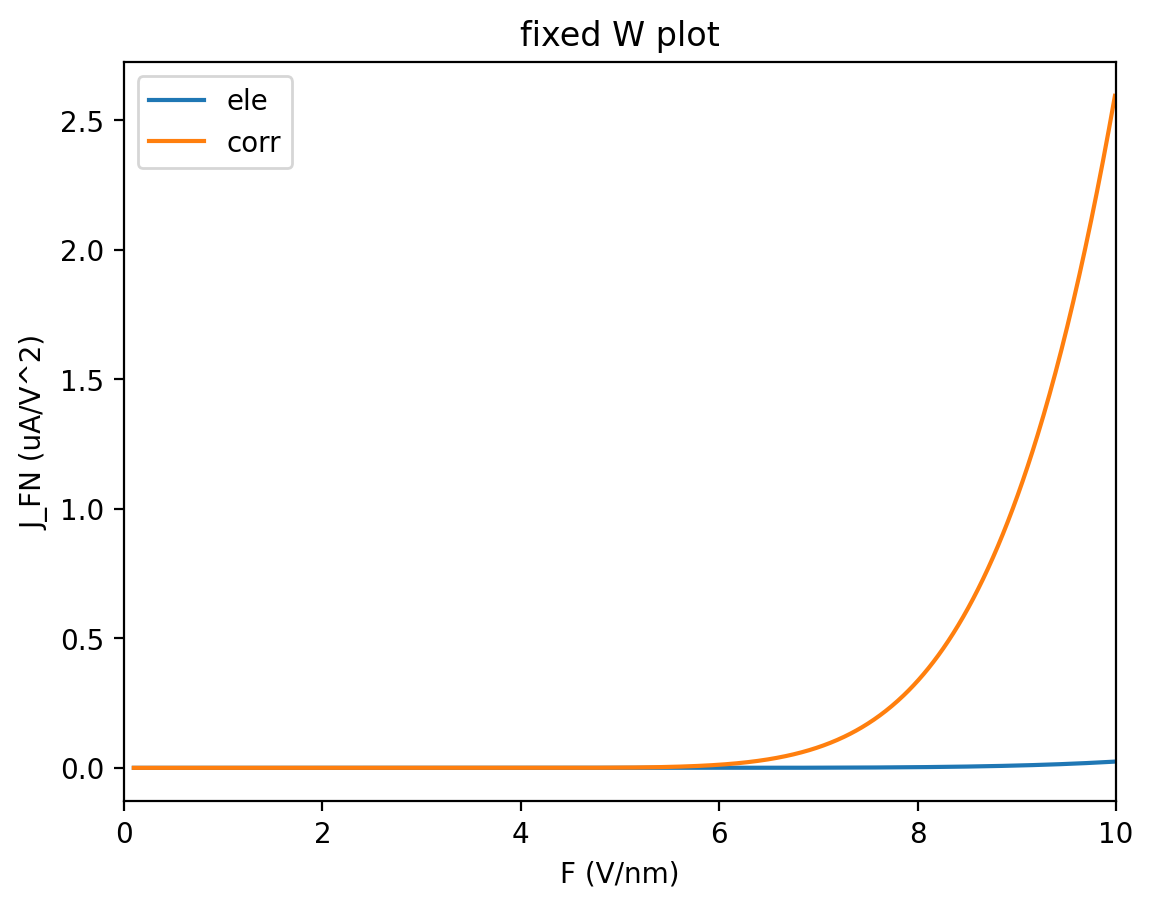

In [212]:
plt.figure(dpi=200)

plt.plot(Fd, currents_ele, label = 'ele')

plt.plot(Fd, currents_corr, label = 'corr')

#plt.plot(Fd, currents_sharp, label = 'sharp')

plt.xlim(0, 10)
#plt.ylim(1e-3, 2.5)
#plt.yscale("log")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()

[          nan          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
 -719.39828651 -654.10179078 -599.68804434 -553.64564351 -514.18072851
 -479.97780217 -450.05024163 -423.64357057 -400.17097406 -379.16917719
 -360.26756001 -343.16609684 -327.61931214 -313.42442177 -300.41243892
 -288.44141471 -277.39123851 -267.15959388 -257.65878101 -248.81319661
 -240.55731784 -232.83407641 -225.59353757 -218.79181926 -212.39020203
 -206.3543915  -200.65390378 -195.26155053 -190.15300535 -185.30643684
 -180.70219675 -176.32255375 -172.15146517 -168.17438071 -164.37807282
 -160.75048973 -157.28062763 -153.95841925 -150.77463621 -147.7208035
 -144.7891241  -141.97241252 -139.264036   -136.65786237 -134.14821369
 -131.72982496 -129.39780725 -127.14761473 -124.97501505 -122.87606283
 -120.84707567 -118.88461268 -116.98545495 -115.14658795 -113.36518553
 -111.6385955  -109.96432638 -108.34003544 -106.76351777 -105.23269626
 -103.7

C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\867960612.py:3: RuntimeWarning: divide by zero encountered in divide
  x = 1/Fd
C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\867960612.py:4: RuntimeWarning: invalid value encountered in divide
  y1 = np.log(currents_ele/Fd**2)
C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\867960612.py:4: RuntimeWarning: divide by zero encountered in log
  y1 = np.log(currents_ele/Fd**2)
C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\867960612.py:6: RuntimeWarning: divide by zero encountered in log
  y2 = np.log(currents_corr/Fd**2)
C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\867960612.py:7: RuntimeWarning: divide by zero encountered in log
  y3 = np.log(currents_sharp/Fd**2)


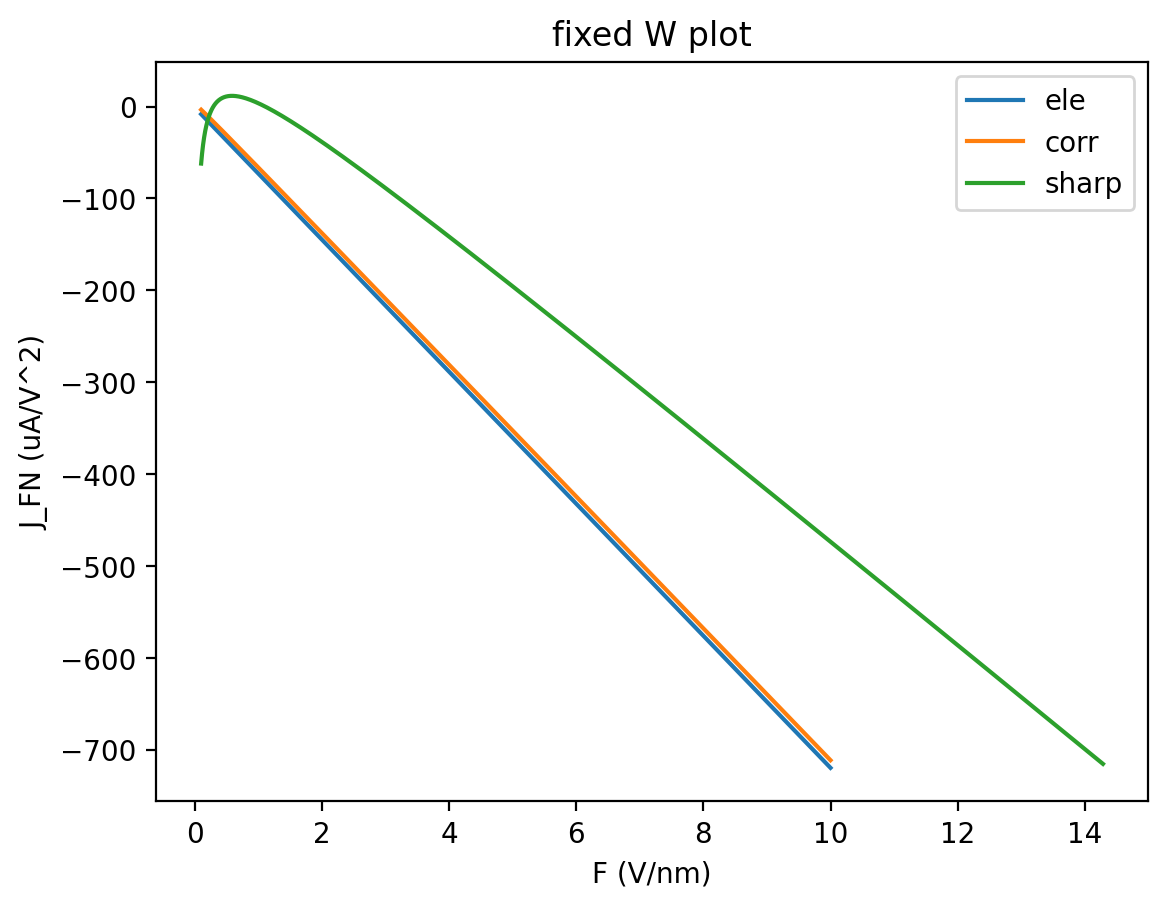

In [57]:
# FN plot

x = 1/Fd
y1 = np.log(currents_ele/Fd**2)
print(y1)
y2 = np.log(currents_corr/Fd**2)
y3 = np.log(currents_sharp/Fd**2)

plt.figure(dpi=200)

plt.plot(x, y1, label = 'ele')
plt.plot(x, y2, label = 'corr')
plt.plot(x, y3, label = 'sharp')

#plt.xlim(2, 4)
#plt.ylim(1e-11, 1e-6)
#plt.yscale("log")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()


# Numerical calculation done before

unfortunately I lost the paper on which I based on to make this calculation

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
plt.style.use('seaborn-v0_8')

In [15]:
def J_FN(F,W):
    aFN = 1.541434e-6
    bFN = 6.830890
    result = aFN * F**2/W * np.exp(-bFN * W**(3/2)/F)
    return result

Fd = np.arange(1, 100, 1)
Wd = np.arange(0, 30, 0.1)

J_FN_fW1 = J_FN(Fd, 4)
J_FN_fW2 = J_FN(Fd, 4.8)
J_FN_fW3 = J_FN(Fd, 5)
J_FN_fW4 = J_FN(Fd, 10)
J_FN_fW5 = J_FN(Fd, 11.5)
J_FN_fW6 = J_FN(Fd, 12)
J_FN_fW7 = J_FN(Fd, 3)

fields = [1, 3, 5, 10]
currents = []
for i in range(0,len(fields)):
    current = J_FN(fields[i], 4.8)
    currents.append(current)

print(currents)

[np.float64(2.036668583798339e-38), np.float64(1.1525818120889776e-16), np.float64(4.6245666075341674e-12), np.float64(2.4372908806223462e-08)]


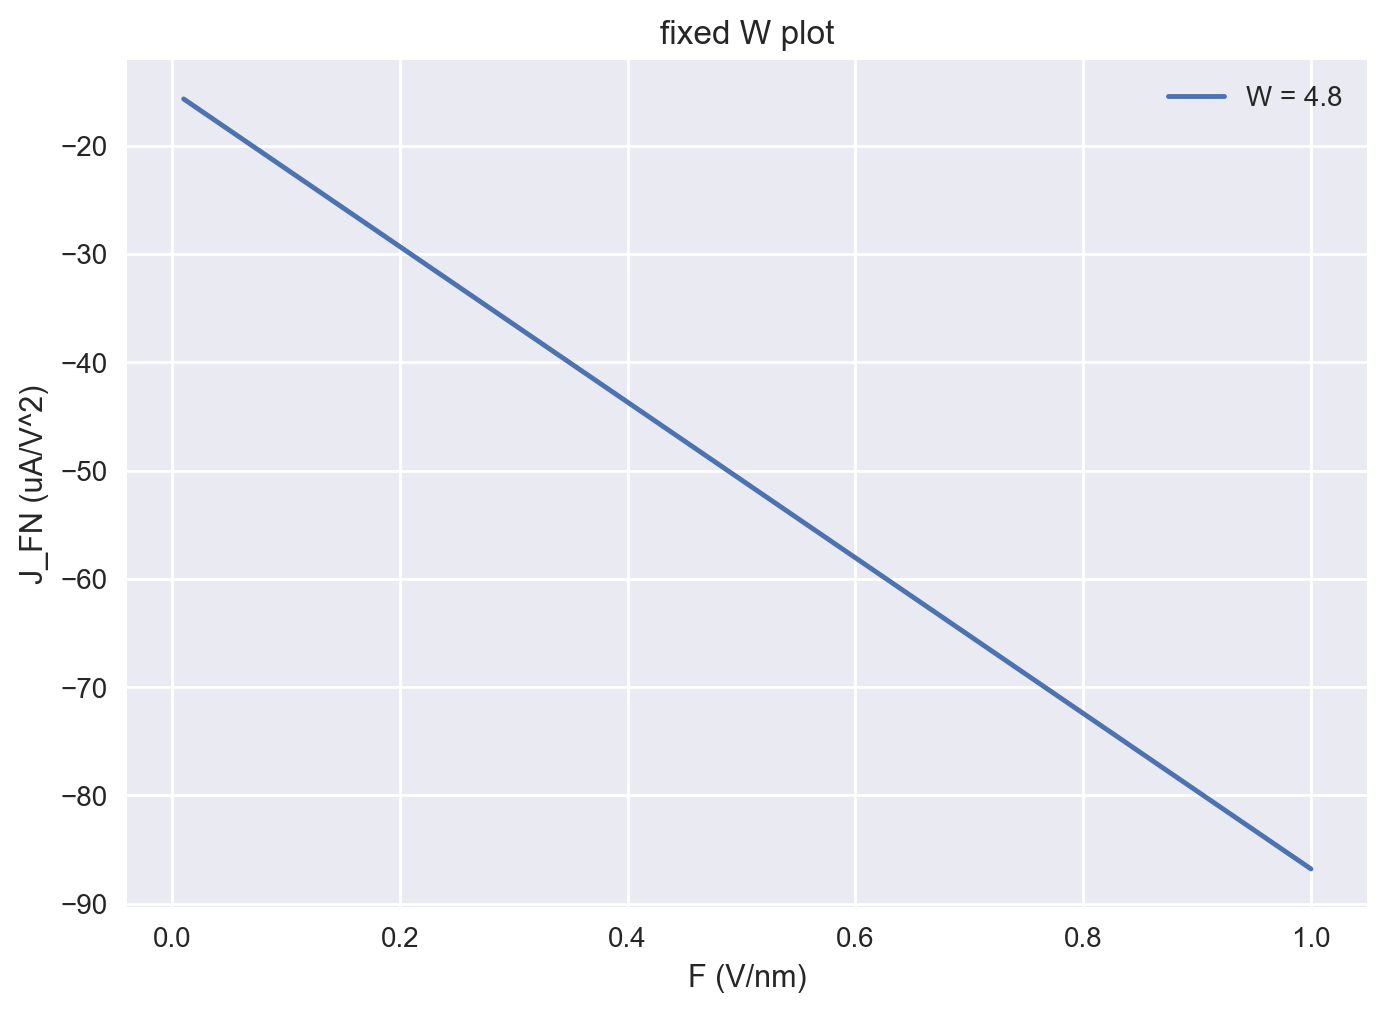

In [16]:
plt.figure(dpi=200)

x = 1/Fd
y = np.log(J_FN_fW2/Fd**2)

#plt.plot(Fd, J_FN_fW1, label = 'W = 4')

#plt.plot(Fd, J_FN_fW2, label = 'W = 4.8')
plt.plot(x, y, label = 'W = 4.8')

#plt.plot(Fd, J_FN_fW3, label = 'W = 5')
#plt.plot(Fd, J_FN_fW4, label = 'W = 10')
#plt.plot(Fd, J_FN_fW7, label = 'W = 3')

#plt.xlim(0, 100)
#plt.ylim(1e-4, 1e2)
#plt.yscale("log")
#plt.xscale('log')

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()

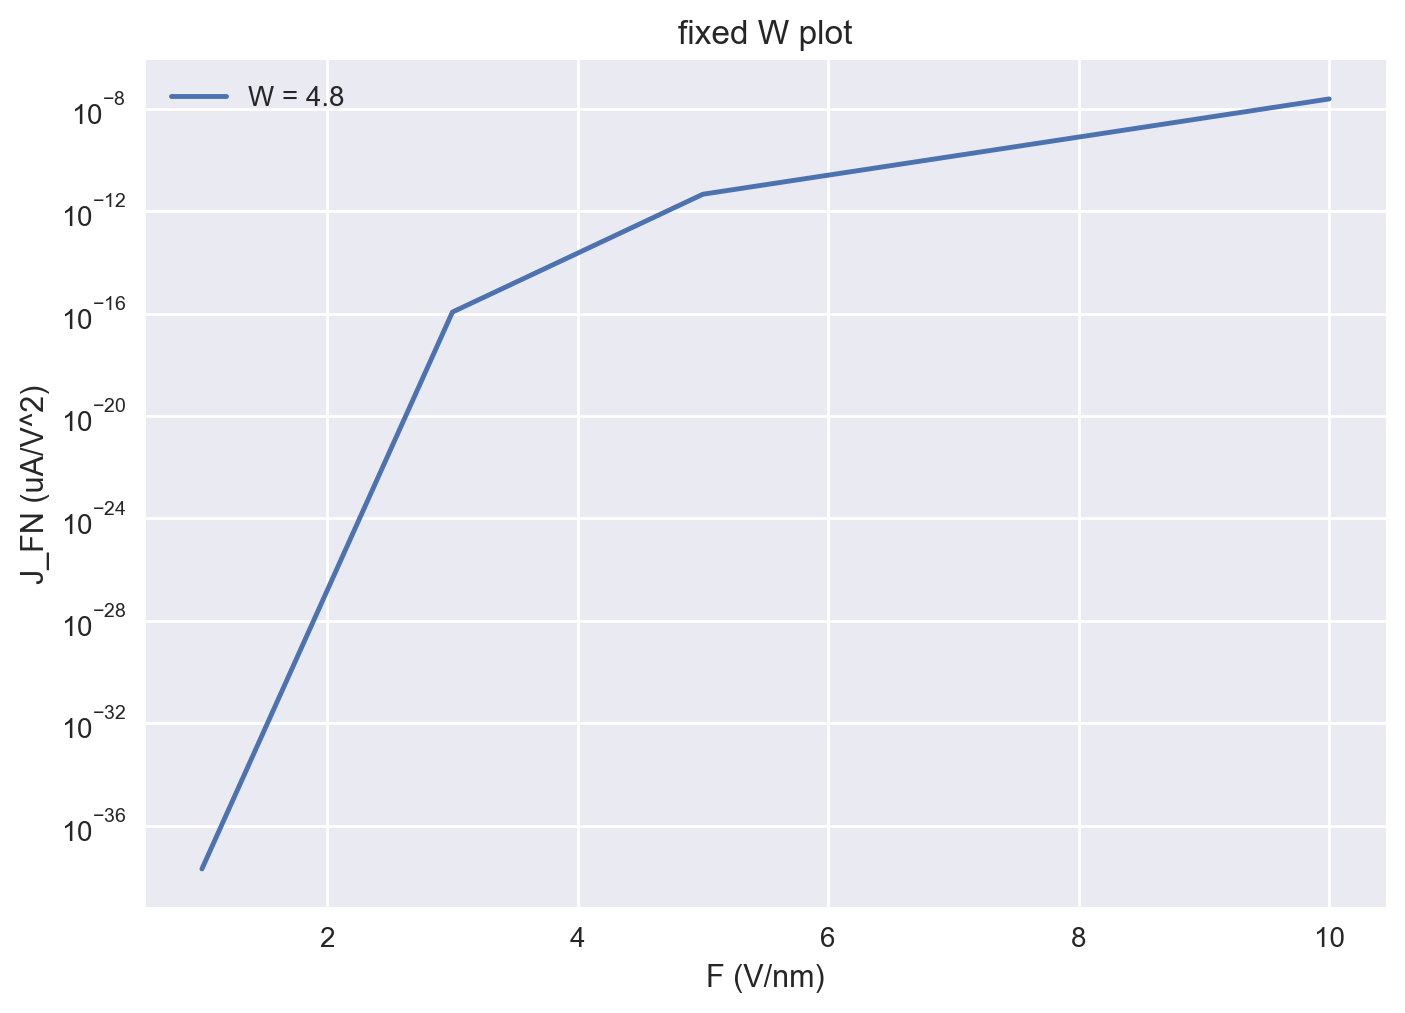

In [17]:
plt.figure(dpi=200)

plt.plot(fields, currents, label = 'W = 4.8')


#plt.xlim(4, 40)
#plt.ylim(0, 0.2)
plt.yscale("linear")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')
plt.yscale("log")

plt.legend()

plt.show()

# Field emission from semiconductors
based on "Quantum Tunneling and Field Electron Emission Theories, (2014)" chapter 13

The story is a little bit different compared to metal field emitters. It is important to note that The FN model and SN model assumes room temperature and metal emitters. However, there are models for semiconductor emitters; they consider the existence of a band structure as well as electrons and holes in the conduction band and valence band respectively.

There is also a component that accounts for changes in the band gap depending on the temperature, but it is a very difficult integration, so in the model I will work with here I will not consider this temperature dependence of the band gap and stick to the assumptions of the book

The model presented showed an expression for the current density of:

$J_s(F,T) = J_{S,e}(F,T) + J_{S,h}(F,T)$

Here, F is the field strength and T is temperature. This means that we can divide the total current density in the hole component and electron components. \
\
Each of the components can be describde as the folling: 

$J_{S,e}(F,T) = J_{FNL, e}(F,T) S_e(T)$

Here $J_{FNL,e}(F,T)$ is the FN-like component of the electron current density and $S_e(T)$ is the term that carries all the features of a semiconductor. They are described as follows: 

$J_{FNL,e}(F,T) = a_{S,e} \frac{F}{\phi^{1/2}} k_B T \exp{((-\frac{b_S,e \phi^{3/2}}{F}))}$\
$S_e(T) = (\frac{d_{F,e}}{d_{F,e} - k_B T} + 1) \exp{(\frac{1}{d_{F,e}} - \frac{1}{k_B T}) \frac{E_g}{2}}$

Where $a_{S,e}$ and $b_{S,e}$ are constants and can be expressed as:

$a_{S,e} = \frac{e^2 m_e^{*1/2}}{4\sqrt{2} \pi^2 \hbar^2}$\
$b_{S,e} = \frac{4(2m_e^*)^{1/2}}{3e\hbar}$

For the hole case almost every equation is the same, only $S_e(T)$ is slightly different:

$S_h(T) = (\frac{d_{F,h}}{d_{F,h} - k_B T} + 1) \exp{-(\frac{1}{d_{F,h}} - \frac{1}{k_B T}) \frac{E_g}{2}}$


regarding the FE constants, we can assume them constant since our doping level is quite low. For this case, according to wikipedia, the electron effective mass $m_e^*$ is just $m_e$. Then for the electron current case, we can assume the constants here be the same as in FN model: 1.54 $\mu$ A eV $V^2$ and 6.83 $eV^{-3/2}$ V $nm^{-1}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
def s_current_density(F,T,W,Eg):
    a = 1.54
    b = 6.83
    e = 1.62e-19
    kb = 8.617333262e-5 # eV K^-1
    ge = 10.24634 #eV^(1/2) nm^-1
    dF = 1/(ge * W**(1/2)/(F))
    print(dF)
    Se = (dF/(dF - kb*T) + 1) * np.exp((1/dF - 1/(kb*T))*Eg/2)
    j = a * F/W**(1/2) *kb * T * np.exp(-b*W**(3/2)/F)
    print(j*Se)

    return j*Se

In [167]:
# considering it is silicon
W = 4
Eg = 1.12

# also condering first at room temperature
T = 300

# field range
F = np.arange(0.01, 10, .01)

In [168]:
current = s_current_density(F,T,W,Eg)

[0.00048798 0.00097596 0.00146394 0.00195192 0.0024399  0.00292787
 0.00341585 0.00390383 0.00439181 0.00487979 0.00536777 0.00585575
 0.00634373 0.00683171 0.00731969 0.00780767 0.00829565 0.00878362
 0.0092716  0.00975958 0.01024756 0.01073554 0.01122352 0.0117115
 0.01219948 0.01268746 0.01317544 0.01366342 0.01415139 0.01463937
 0.01512735 0.01561533 0.01610331 0.01659129 0.01707927 0.01756725
 0.01805523 0.01854321 0.01903119 0.01951916 0.02000714 0.02049512
 0.0209831  0.02147108 0.02195906 0.02244704 0.02293502 0.023423
 0.02391098 0.02439896 0.02488694 0.02537491 0.02586289 0.02635087
 0.02683885 0.02732683 0.02781481 0.02830279 0.02879077 0.02927875
 0.02976673 0.03025471 0.03074268 0.03123066 0.03171864 0.03220662
 0.0326946  0.03318258 0.03367056 0.03415854 0.03464652 0.0351345
 0.03562248 0.03611046 0.03659843 0.03708641 0.03757439 0.03806237
 0.03855035 0.03903833 0.03952631 0.04001429 0.04050227 0.04099025
 0.04147823 0.0419662  0.04245418 0.04294216 0.04343014 0.04391812

C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\1066785260.py:9: RuntimeWarning: overflow encountered in exp
  Se = (dF/(dF - kb*T) - 1) * np.exp((1/dF - 1/(kb*T))*Eg/2)
C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\1066785260.py:11: RuntimeWarning: invalid value encountered in multiply
  print(j*Se)
C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\1066785260.py:13: RuntimeWarning: invalid value encountered in multiply
  return j*Se


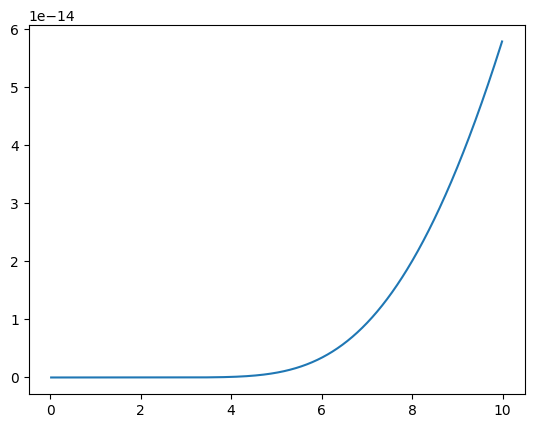

In [169]:
plt.plot(F, current)

[-15.50206256 -15.47338945 -15.44483057 -15.41638525 -15.38805281
 -15.35983257 -15.33172388 -15.30372607 -15.27583848 -15.24806048
 -15.2203914  -15.19283062 -15.16537751 -15.13803142 -15.11079173
 -15.08365783 -15.0566291  -15.02970493 -15.00288472 -14.97616786
 -14.94955375 -14.92304181 -14.89663145 -14.87032209 -14.84411314
 -14.81800404 -14.79199421 -14.76608308 -14.74027011 -14.71455473
 -14.68893639 -14.66341454 -14.63798863 -14.61265814 -14.58742251
 -14.56228122 -14.53723374 -14.51227955 -14.48741813 -14.46264896
 -14.43797152 -14.41338531 -14.38888983 -14.36448457 -14.34016903
 -14.31594273 -14.29180517 -14.26775586 -14.24379432 -14.21992008
 -14.19613265 -14.17243156 -14.14881635 -14.12528654 -14.10184168
 -14.0784813  -14.05520496 -14.03201219 -14.00890255 -13.98587559
 -13.96293088 -13.94006796 -13.9172864  -13.89458578 -13.87196565
 -13.84942559 -13.82696518 -13.804584   -13.78228162 -13.76005763
 -13.73791162 -13.71584319 -13.69385191 -13.67193739 -13.65009923
 -13.62833

C:\Users\Takan\AppData\Local\Temp\ipykernel_37740\2337415929.py:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(current/F**2)


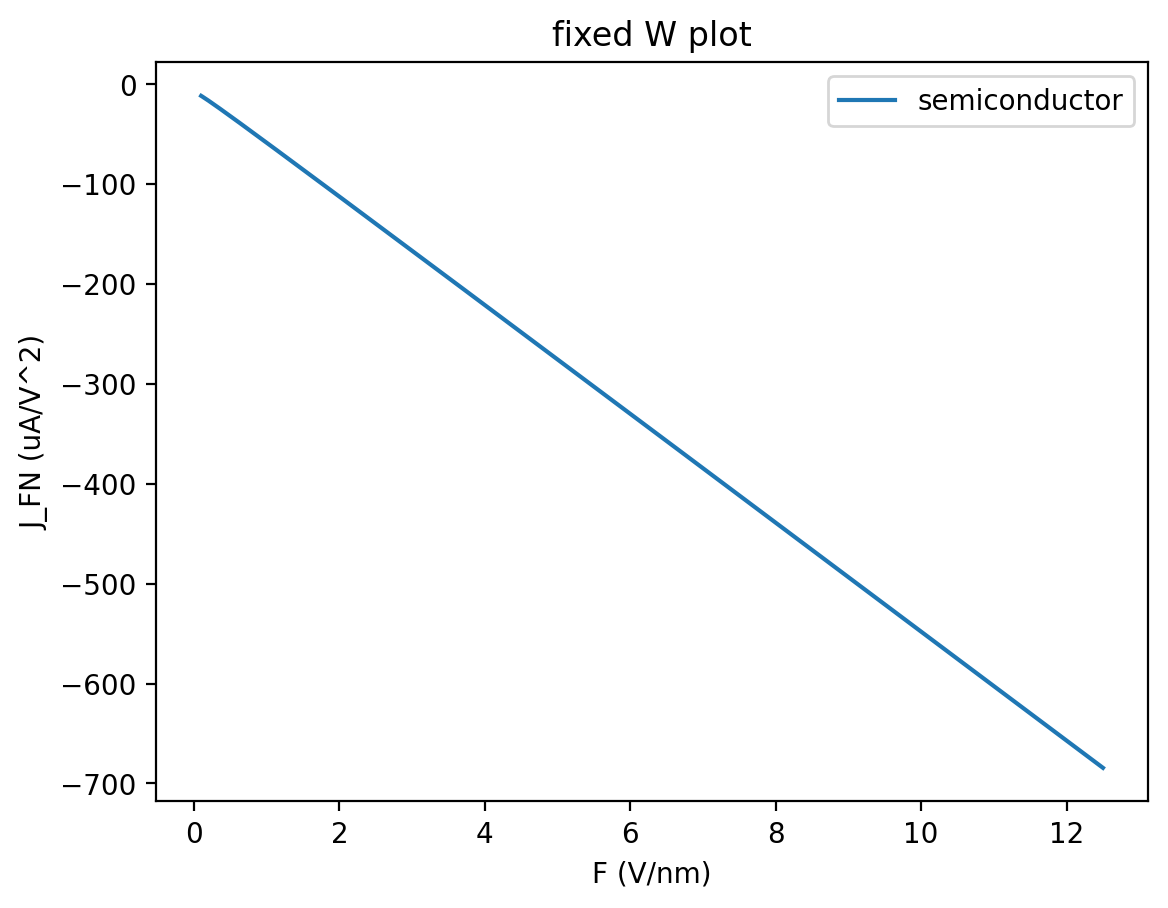

In [113]:
x = 1/F
y = np.log(current/F**2)
print(y1)


plt.figure(dpi=200)

plt.plot(x, y, label = 'semiconductor')

#plt.xlim(2, 4)
#plt.ylim(1e-11, 1e-6)
#plt.yscale("log")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()
